## Raj Choudhary

## 16BCE1384

## Repository-link: https://github.com/raj1603chdry/CSE4020-MachineLearningLabs
<br /><br />

### Importing the libraries 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
from scipy import stats
import seaborn as sns;sns.set()
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importing the dataset 

In [2]:
X = pd.read_csv('../datasets/ameo_dataset/processed_dataset/X.csv')
y = pd.read_csv('../datasets/ameo_dataset/processed_dataset/y_cat.csv')

**Splitting the dataset into training set and test set**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### Data Analysis 

In [4]:
X.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,...,GraduationYear_2016,GraduationYear_2017,Gender_f,Gender_m,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,CollegeTier_1,CollegeTier_2
0,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,...,0,0,1,0,1,0,0,0,0,1
1,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,...,0,0,0,1,1,0,0,0,0,1
2,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,...,0,0,1,0,1,0,0,0,0,1
3,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,...,0,0,0,1,1,0,0,0,1,0
4,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,...,0,0,0,1,1,0,0,0,0,1


In [5]:
X.columns

Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Specialization_CE',
       'Specialization_CS', 'Specialization_EC', 'Specialization_EL',
       'Specialization_ME', 'Specialization_other',
       'CollegeState_Andhra Pradesh', 'CollegeState_Assam',
       'CollegeState_Bihar', 'CollegeState_Chhattisgarh', 'CollegeState_Delhi',
       'CollegeState_Goa', 'CollegeState_Gujarat', 'CollegeState_Haryana',
       'CollegeState_Himachal Pradesh', 'CollegeState_Jammu and Kashmir',
       'CollegeState_Jharkhand', 'CollegeState_Karnataka',
       'CollegeState_Kerala', 'CollegeState_Madhya Pradesh',
       'CollegeState_Maharashtra', 'CollegeState_Meghalaya',
       'CollegeState_Orissa', 'CollegeSt

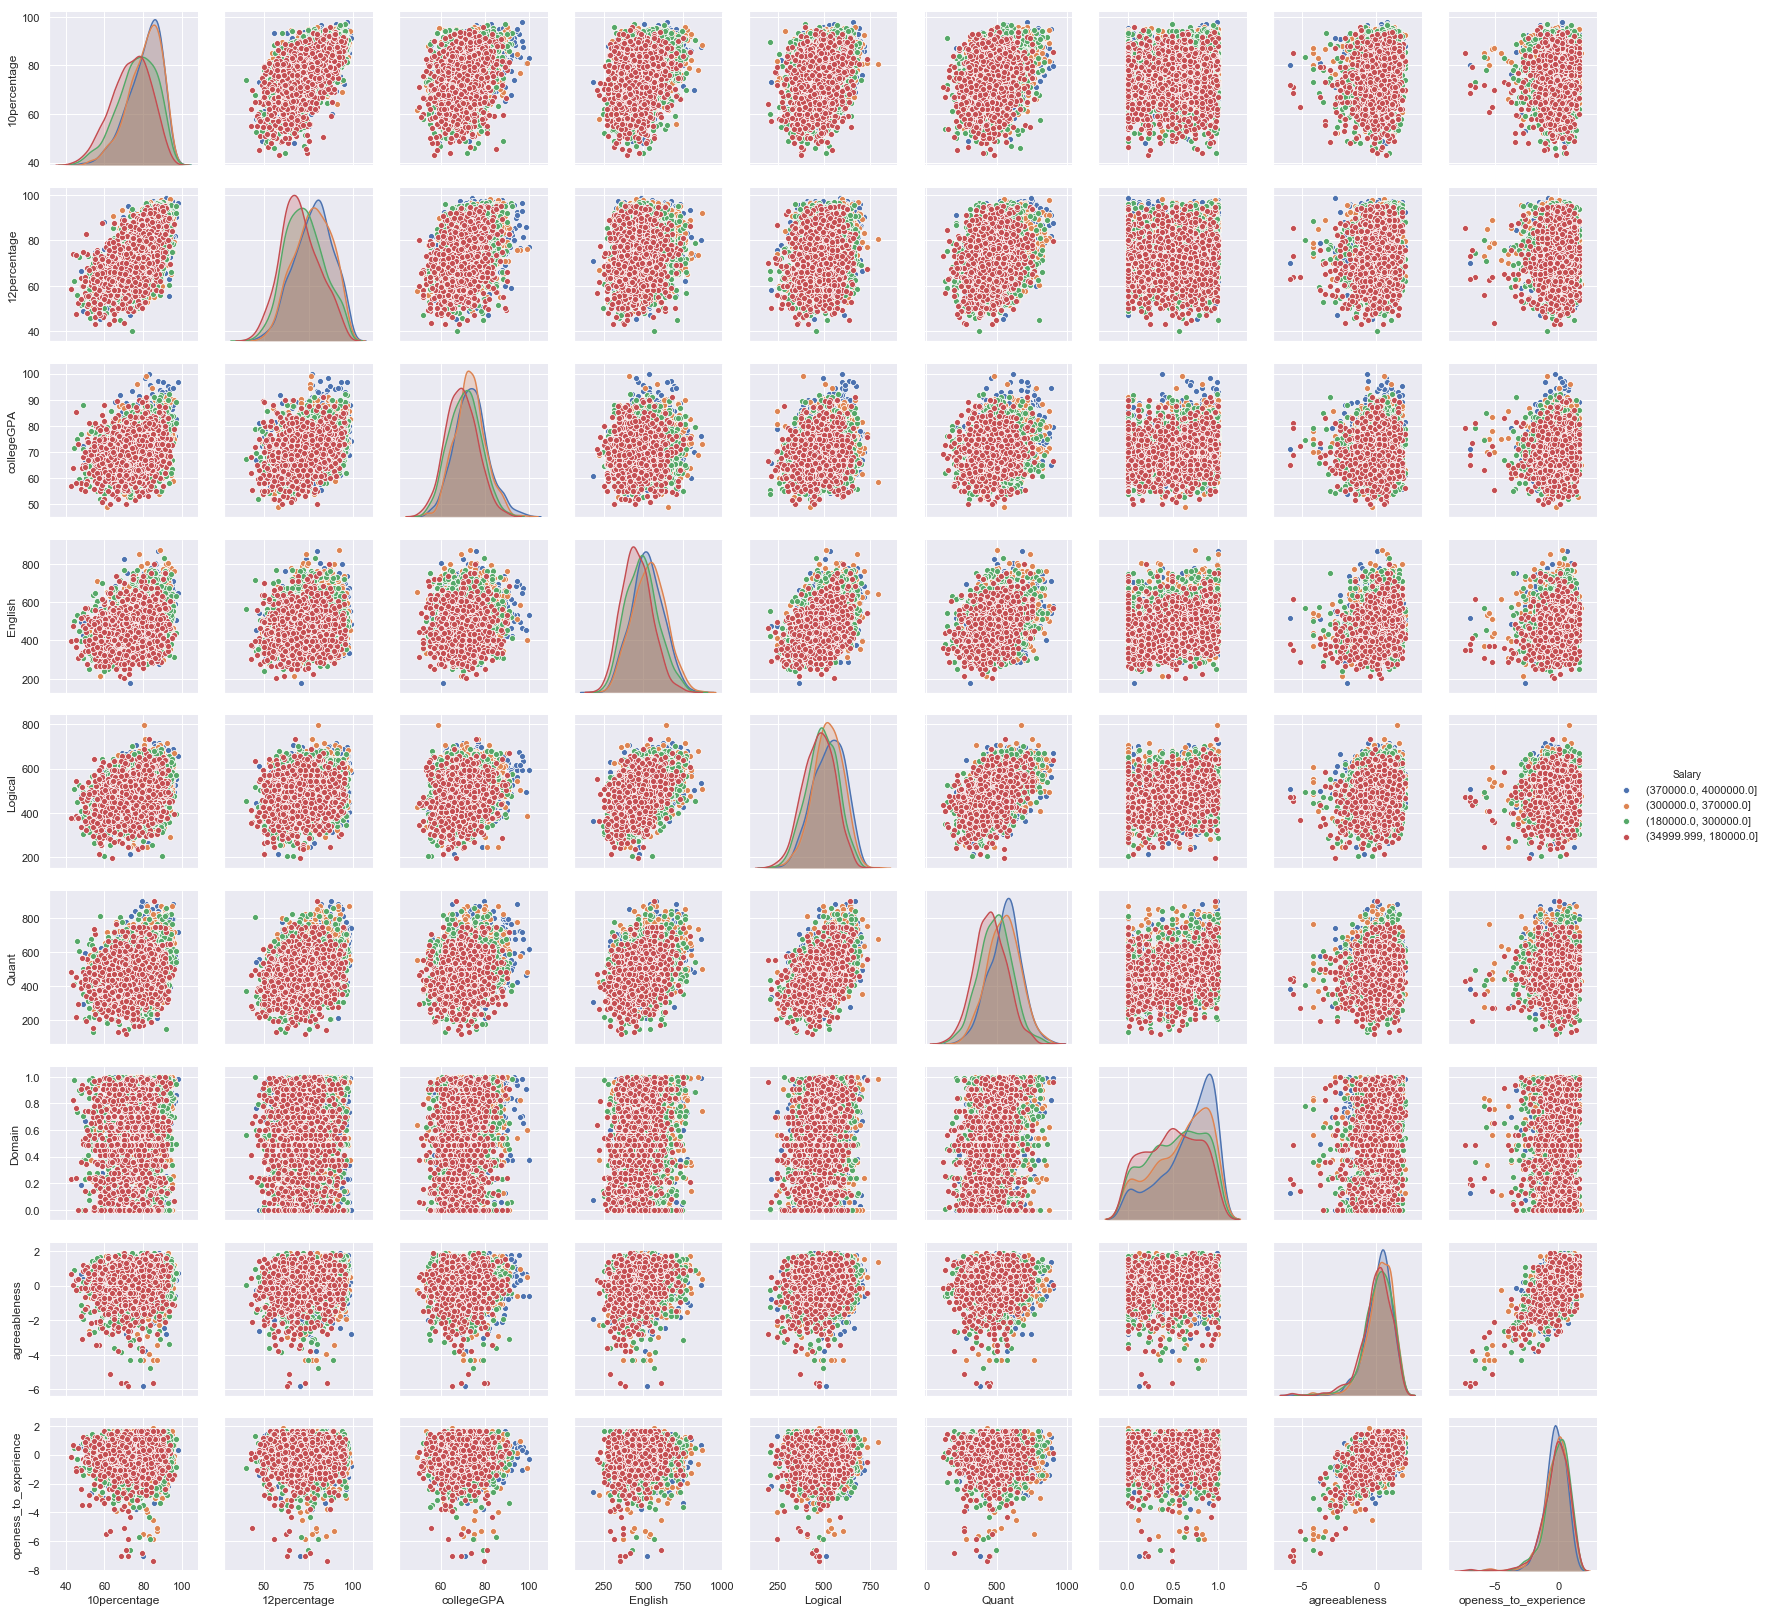

In [6]:
X['Salary'] = y['Salary']
cols = ['10percentage', 
        '12percentage', 
        'collegeGPA', 
        'English',
        'Logical',
        'Quant', 
        'Domain', 
        'agreeableness', 
        'openess_to_experience']
sb.pairplot(X, vars = cols, hue = 'Salary')

In [7]:
X.loc[X['Salary']=='(34999.999, 180000.0]','Salary']=1
X.loc[X['Salary']=='(180000.0, 300000.0]','Salary']=2
X.loc[X['Salary']=='(300000.0, 370000.0]','Salary']=3
X.loc[X['Salary']=='(370000.0, 4000000.0]','Salary']=4
sal = X['Salary']

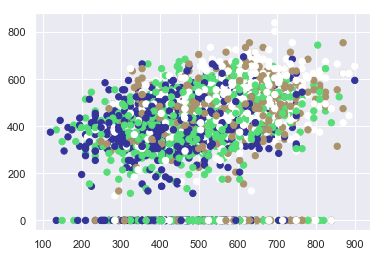

In [8]:
plt.scatter(X['Quant'],X['ComputerProgramming'],c=sal,s=40,cmap='terrain');

In [9]:
cols_copy = ['Quant','ComputerProgramming']
X_train_short = X_train[cols_copy]
X_test_short = X_test[cols_copy]
X_train_short.head()

,Quant,ComputerProgramming
2336,575,495
3800,720,0
1599,320,405
2981,595,305
969,510,565


In [10]:
y_train.loc[y_train['Salary']=='(34999.999, 180000.0]','Salary']=1
y_train.loc[y_train['Salary']=='(180000.0, 300000.0]','Salary']=2
y_train.loc[y_train['Salary']=='(300000.0, 370000.0]','Salary']=3
y_train.loc[y_train['Salary']=='(370000.0, 4000000.0]','Salary']=4
y_test.loc[y_test['Salary']=='(34999.999, 180000.0]','Salary']=1
y_test.loc[y_test['Salary']=='(180000.0, 300000.0]','Salary']=2
y_test.loc[y_test['Salary']=='(300000.0, 370000.0]','Salary']=3
y_test.loc[y_test['Salary']=='(370000.0, 4000000.0]','Salary']=4

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: 

In [11]:
y_test.head()

,Salary
3216,2
883,4
367,4
2226,1
2578,1


### Making a pipeline for SVM training for classification problem 

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [13]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state = 1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10,
                  n_jobs = -1,
                  verbose = 1)

gs.fit(X_train_short, y_train.values.ravel())

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  5.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svc__kernel': ['linear']}, {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svc__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [14]:
print(gs.best_score_)
print(gs.best_params_)

0.3689806128830519
{'svc__C': 0.1, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}


In [15]:
clf = gs.best_estimator_
clf.fit(X_train_short, y_train.values.ravel())

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [16]:
print('Train Accuracy: %.3f' % (clf.score(X_train_short, y_train)*100))
print('Test Accuracy: %.3f' % (clf.score(X_test_short, y_test)*100))

Train Accuracy: 37.148
Test Accuracy: 35.625


<p style="color:red;">Due to some problem the visualisation for the SVM could not be processed</p>

##### From the above processing, we find that 'rbf' kernel with C = 0.1 and gamma = 1.0 produces the best result for the classification with a training accuracy of 37.148% and test accuracy of 35.625% 

### Making a pipeline for SVM training for regression problem 

In [2]:
X = pd.read_csv('../datasets/ameo_dataset/processed_dataset/X.csv')
y = pd.read_csv('../datasets/ameo_dataset/processed_dataset/y_reg.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [4]:
cols_copy = ['Quant']
X_train_short = X_train[cols_copy]
X_test_short = X_test[cols_copy]
X_train_short.head()

,Quant
2471,545
2190,445
1146,280
3353,355
3924,475


In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [6]:
pipe_svc = make_pipeline(StandardScaler(),
                         SVR())

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svr__C': param_range,
               'svr__kernel': ['linear']},
              {'svr__C': param_range,
               'svr__gamma': param_range,
               'svr__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc,
                  param_grid = param_grid,
                  scoring = 'r2',
                  cv = 10,
                  n_jobs = -1,
                  verbose = 1)

gs.fit(X_train_short, y_train.values.ravel())

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   40.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'svr__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svr__kernel': ['linear']}, {'svr__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svr__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'svr__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

In [7]:
print(gs.best_score_)
print(gs.best_params_)

0.05725417329750054
{'svr__C': 1000.0, 'svr__kernel': 'linear'}


In [8]:
reg = gs.best_estimator_
reg.fit(X_train_short, y_train.values.ravel())

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [9]:
y_train_pred = reg.predict(X_train_short)
y_test_pred = reg.predict(X_test_short)
print('Train Accuracy: %.3f' % (r2_score(y_train, y_train_pred)))
print('Test Accuracy: %.3f' % (r2_score(y_test, y_test_pred)))

Train Accuracy: 0.046
Test Accuracy: 0.024


##### From the above processing, we find that 'linear' kernel with C = 1000 produces the best result for the regression with a training r2 score of 0.046 and test r2 score of 0.024. This indicates the fact that the data is not linearly separable.